In [120]:
#https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6
#https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.preprocessing import Normalizer

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/irvin-s/in-1166-smd/main/missao_2/data/crx.data", sep=',')

In [122]:
#Verificando tamanho do dataset
df.shape

(690, 16)

In [123]:
#Verificando campos vazios, nulos e truncados.
df.isnull().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
dtype: int64

Apesar do dataset não apresentar valores vazios, é necessário verificar a existência de dados com marcadores. Os marcadores indicam valores que estão ausentes, mas que são importantes para o processo de mineração.

In [124]:
#Verificando nulos sinalizados com um marcador
df.head(100)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,00171,0,-
96,b,23.00,0.625,y,p,aa,v,0.125,t,f,0,f,g,00180,1,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
98,a,22.50,11.000,y,p,q,v,3.000,t,f,0,t,g,00268,0,-


Para o dataset analisado, os dados faltantes estão sinalizados utilizando uma "?", como visto na linha 97 coluna a2. Vamos converter os marcadores para valores NaN, para que sejam entendidos como valores nulos pelas blibliotecas.

In [125]:
#Convertendo marcadores para NaN
df = df.replace('?', np.nan)
df.head(100)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,a,28.58,3.540,u,g,i,bb,0.500,t,f,0,t,g,00171,0,-
96,b,23.00,0.625,y,p,aa,v,0.125,t,f,0,f,g,00180,1,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
98,a,22.50,11.000,y,p,q,v,3.000,t,f,0,t,g,00268,0,-


Agora é possivel utilizar o gráfico da biblioteca missingno para visualizar a distribuição dos dados nulos.

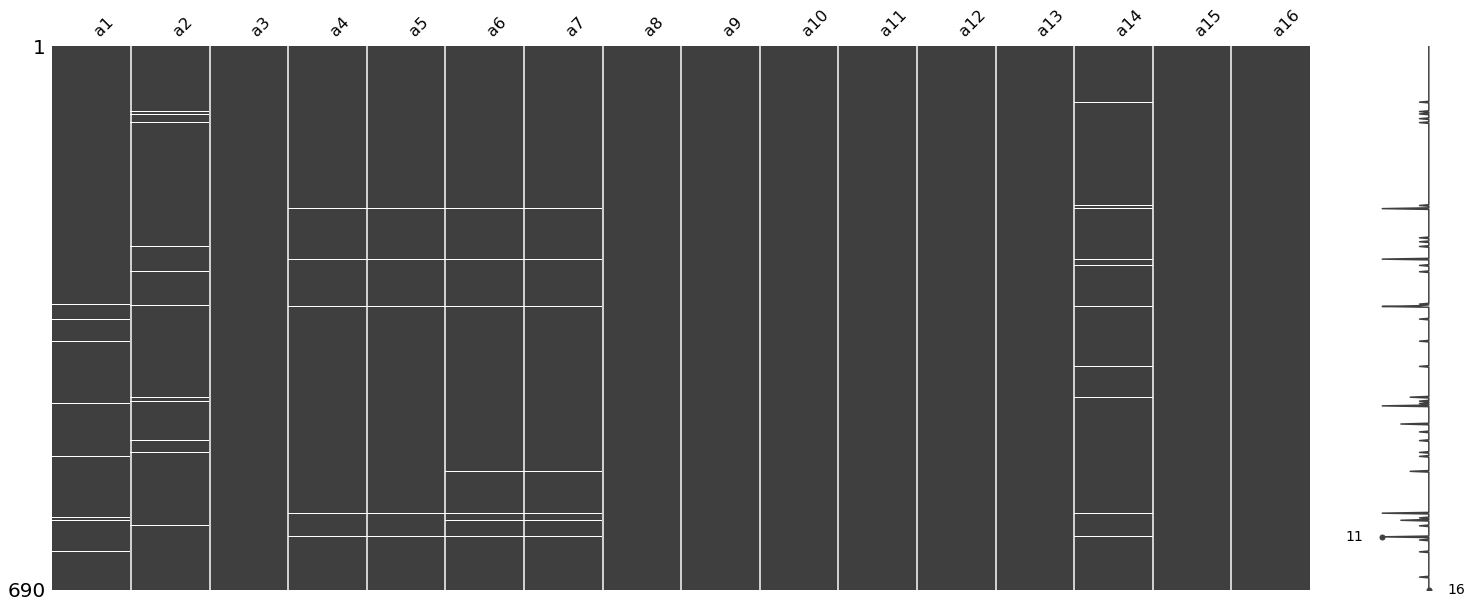

In [126]:
#Matrix com a distribuição de dados nulos.
msno.matrix(df)

O atual Dataset não possui muitos nulos, para as váriaveis categorias os dados serão removidos e para as variávies continuas serão calculados por sua média. Dados nulos geram dados imprecisos após a etapa de processamento. Então é necessário alterar os dados.

In [127]:
#Verificando as variávies númericas
df.describe()

,a3,a8,a11,a15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [128]:
#Verificando os tipos das váriaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      678 non-null    object 
 1   a2      678 non-null    object 
 2   a3      690 non-null    float64
 3   a4      684 non-null    object 
 4   a5      684 non-null    object 
 5   a6      681 non-null    object 
 6   a7      681 non-null    object 
 7   a8      690 non-null    float64
 8   a9      690 non-null    object 
 9   a10     690 non-null    object 
 10  a11     690 non-null    int64  
 11  a12     690 non-null    object 
 12  a13     690 non-null    object 
 13  a14     677 non-null    object 
 14  a15     690 non-null    int64  
 15  a16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


As variáveis a2 e a14, são númericas, mas foram definidas com tipos diferentes. Vamos adicionar os tipos corretos.

In [129]:
#Alterando os tipos das váriaveis
df['a2'] = df['a2'].astype(np.float16)
df['a14'] = df['a14'].astype(np.float16)
df.describe()

,a2,a3,a8,a11,a14,a15
count,678.000000,690.000000,690.000000,690.00000,677.0,690.000000
mean,31.578125,4.758725,2.223406,2.40000,inf,1017.385507
std,11.960938,4.978163,3.346513,4.86294,inf,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.0,0.000000
25%,22.593750,1.000000,0.165000,0.00000,75.0,0.000000
50%,28.468750,2.750000,1.000000,0.00000,160.0,5.000000
75%,38.218750,7.207500,2.625000,3.00000,276.0,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.0,100000.000000


Como apresentado pelos colegas em sala, a váriavel a14 representa um código postal.

In [131]:
#Atualizando valores nulos da várivel a2 com sua média. 
a2_media = df.a2.median()
df.a2.fillna(a2_media, inplace=True)


Os valores nulos(NaN) foram preenchidos com a sua média na coluna a2.

In [132]:
#Atualizando os valores nulos das váriaveis a1, a4, a5, a6, a7 com os valores mais frequentes
a1_freq = df.a1.value_counts()[0:1]
a4_freq = df.a4.value_counts()[0:1]
a5_freq = df.a5.value_counts()[0:1]
a6_freq = df.a6.value_counts()[0:1]
a7_freq = df.a7.value_counts()[0:1]
a14_freq = df.a14.value_counts()[0]
df.a1.fillna(a1_freq, inplace=True)
df.a4.fillna(a4_freq, inplace=True)
df.a5.fillna(a5_freq, inplace=True)
df.a6.fillna(a6_freq, inplace=True)
df.a7.fillna(a7_freq, inplace=True)
df.a14.fillna(a14_freq, inplace=True)

Todos os dados nulos foram substituidos por suas médias para as váriaveis númericas. Para as váriaveis categóricas os valores que mais se repetem substituiram os nulos.

In [133]:
#Tranformar dados catégoricos em binários
df_dummified = pd.get_dummies(df, columns=['a1', 'a4', 'a5', 'a6', 'a7', 'a9', 'a10', 'a12', 'a13', 'a16'])
print(df_dummified)

            a2      a3    a8  a11    a14  ...  a13_g  a13_p  a13_s  a16_+  a16_-
0    30.828125   0.000  1.25    1  202.0  ...      1      0      0      1      0
1    58.656250   4.460  3.04    6   43.0  ...      1      0      0      1      0
2    24.500000   0.500  1.50    0  280.0  ...      1      0      0      1      0
3    27.828125   1.540  3.75    5  100.0  ...      1      0      0      1      0
4    20.171875   5.625  1.71    0  120.0  ...      0      0      1      1      0
..         ...     ...   ...  ...    ...  ...    ...    ...    ...    ...    ...
685  21.078125  10.085  1.25    0  260.0  ...      1      0      0      0      1
686  22.671875   0.750  2.00    2  200.0  ...      1      0      0      0      1
687  25.250000  13.500  2.00    1  200.0  ...      1      0      0      0      1
688  17.921875   0.205  0.04    0  280.0  ...      1      0      0      0      1
689  35.000000   3.375  8.29    0    0.0  ...      1      0      0      0      1

[690 rows x 48 columns]


Os dados categóricos foram transformados para valores binários e categorizados por colunas, afim de facilitar sua utilização para o processamento.

In [151]:
#Normalização dos dados númericos
X = df_dummified.iloc[:, 0:3].values

[[3.0828125e+01 0.0000000e+00 1.2500000e+00]
 [5.8656250e+01 4.4600000e+00 3.0400000e+00]
 [2.4500000e+01 5.0000000e-01 1.5000000e+00]
 ...
 [2.5250000e+01 1.3500000e+01 2.0000000e+00]
 [1.7921875e+01 2.0500000e-01 4.0000000e-02]
 [3.5000000e+01 3.3750000e+00 8.2900000e+00]]
